AMPONSAH DANIEL

4290320


ATMOSPHERIC FIELD WORK

# IMPORTING ALL NECCESARY LIBRARIES

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors

# OPENING THE DATA

In [2]:
# ds = xr.open_dataset('CHILE_RR.nc' , engine= 'netcdf4')
#ds

da=xr.open_mfdataset('C:/Users/ampon/Desktop/PYTHON/New folder/*.nc')

da

<xarray.Dataset>
Dimensions:   (lon: 174, lat: 156, datetime: 3653)
Coordinates:
  * lon       (lon) float32 -109.5 -109.2 -109.0 -108.8 ... -66.75 -66.5 -66.25
  * lat       (lat) float32 -17.0 -17.25 -17.5 -17.75 ... -55.25 -55.5 -55.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 156, 174), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

# SELECTING THE PARAMETER

In [3]:
CHILE_data= da.precip
CHILE_data

<xarray.DataArray 'precip' (datetime: 3653, lat: 156, lon: 174)>
dask.array<concatenate, shape=(3653, 156, 174), dtype=float32, chunksize=(366, 156, 174), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -109.5 -109.2 -109.0 -108.8 ... -66.75 -66.5 -66.25
  * lat       (lat) float32 -17.0 -17.25 -17.5 -17.75 ... -55.25 -55.5 -55.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  crs

# REMOVING CONSTANT -99.0 VALUES

In [4]:
CHILE_RR = CHILE_data.where(CHILE_data != -99.0 ,np.nan)
CHILE_RR

<xarray.DataArray 'precip' (datetime: 3653, lat: 156, lon: 174)>
dask.array<where, shape=(3653, 156, 174), dtype=float32, chunksize=(366, 156, 174), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -109.5 -109.2 -109.0 -108.8 ... -66.75 -66.5 -66.25
  * lat       (lat) float32 -17.0 -17.25 -17.5 -17.75 ... -55.25 -55.5 -55.75
  * datetime  (datetime) datetime64[ns] 2011-01-01 2011-01-02 ... 2020-12-31
Attributes:
    grid_mapping:  crs

In [5]:
CHILE_rr= CHILE_RR.sel(lon= -71.35, lat= -35.25, method='nearest')

# Computing the monthly rainfall totals and computing their longterm climatologies for each month.

In [26]:
monthly_totals = CHILE_RR.resample(datetime='1M').sum('datetime')
monthly_climatology = monthly_totals.groupby('datetime.month').mean('datetime')


# computing the annual totals and average across the country and timeseries that provides information on the year-to-year changes and trends.

In [56]:
annual_totals = CHILE_rr.resample(datetime='1Y').sum('datetime')
annual_average = annual_totals.groupby('datetime.year').mean('datetime')
annual_average
# annual_average =annual_totals.groupby('datetime.year').mean('datetime')

<xarray.DataArray 'precip' (year: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -71.25
    lat      float32 -35.25
  * year     (year) int64 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020

# TIME SERIES

In [44]:
year=['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


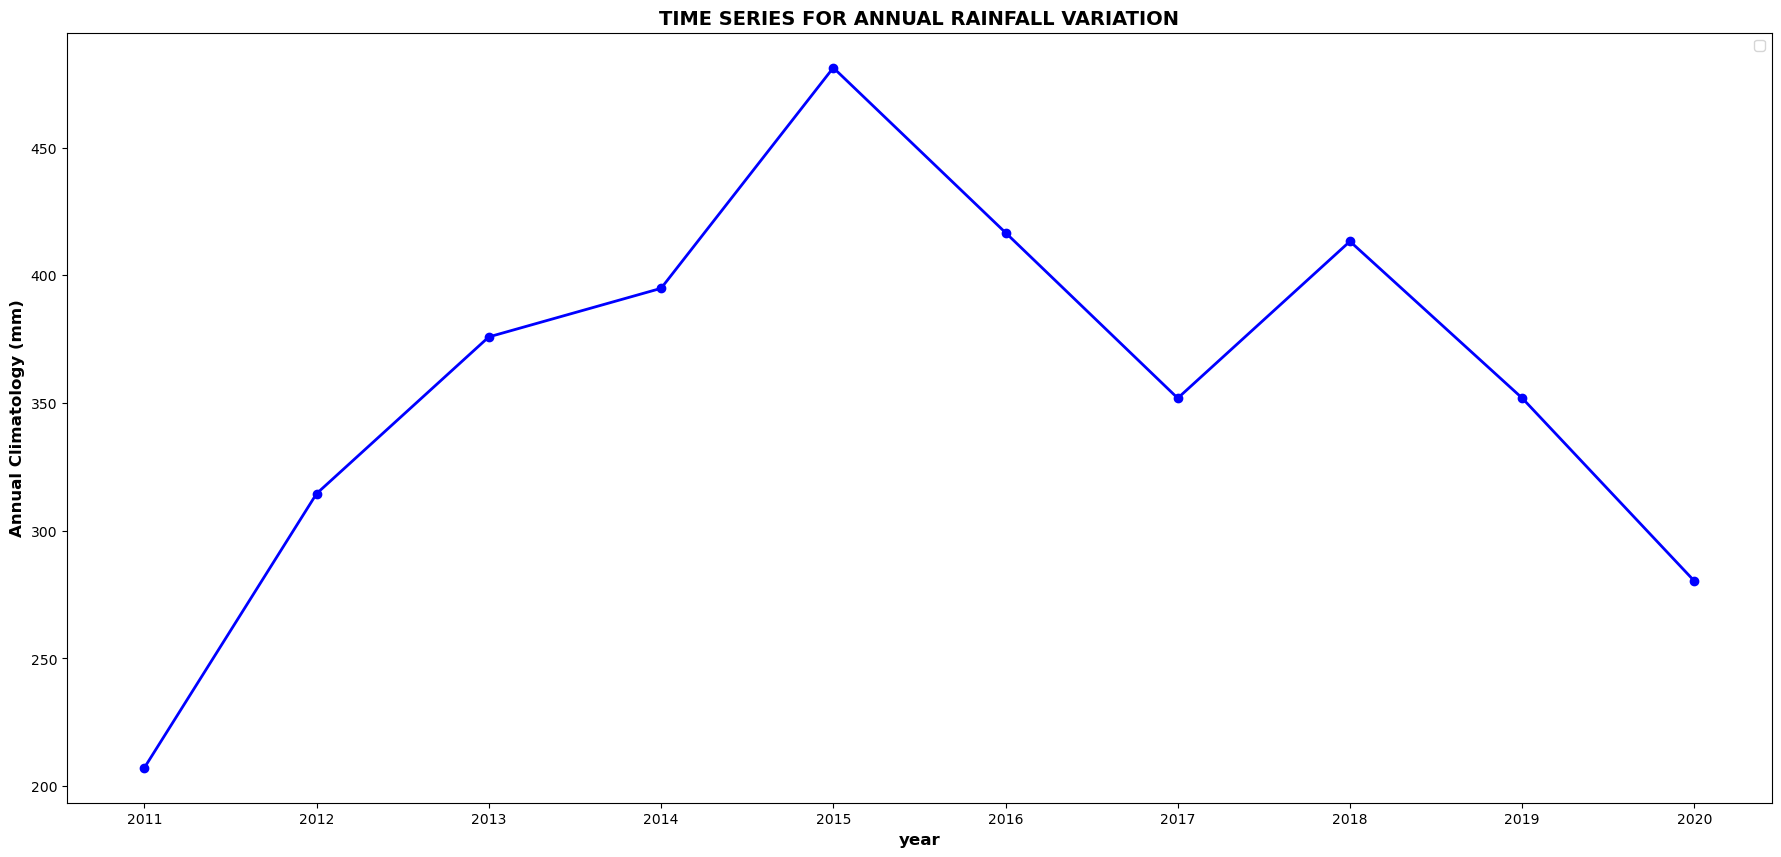

In [57]:
fig, ax = plt.subplots(figsize=(22, 10))
# ax = ax.flatten()

ax.plot(year,annual_average,color='blue', marker='o', linewidth=2)
ax.set_xlabel('year', fontsize=12,fontweight='bold')
ax.set_ylabel('Annual Climatology (mm)', fontsize=12, fontweight='bold')
ax.legend()
ax.set_title('TIME SERIES FOR ANNUAL RAINFALL VARIATION', fontsize=14, fontweight='bold')


fig.savefig('annual-rainfall-clim', bbox_inches='tight', dpi=500)

# Compute the number of dry (RR<1mm) and wet (RR>=1mm) days (per month and per year) for your case study region and present a spatial and timeseries visualization of the output

In [35]:
wet_days = CHILE_rr.where(CHILE_rr >= 1)
dry_days = CHILE_rr.where(CHILE_rr < 1)

In [36]:
monthly_dry_days = dry_days.groupby('datetime.month').count('datetime')
monthly_wet_days = wet_days.groupby('datetime.month').count('datetime')
annual_dry_days  = dry_days.groupby('datetime.year').count('datetime')
annual_wet_days  = wet_days.groupby('datetime.year').count('datetime')

# FOR TIME SERIES

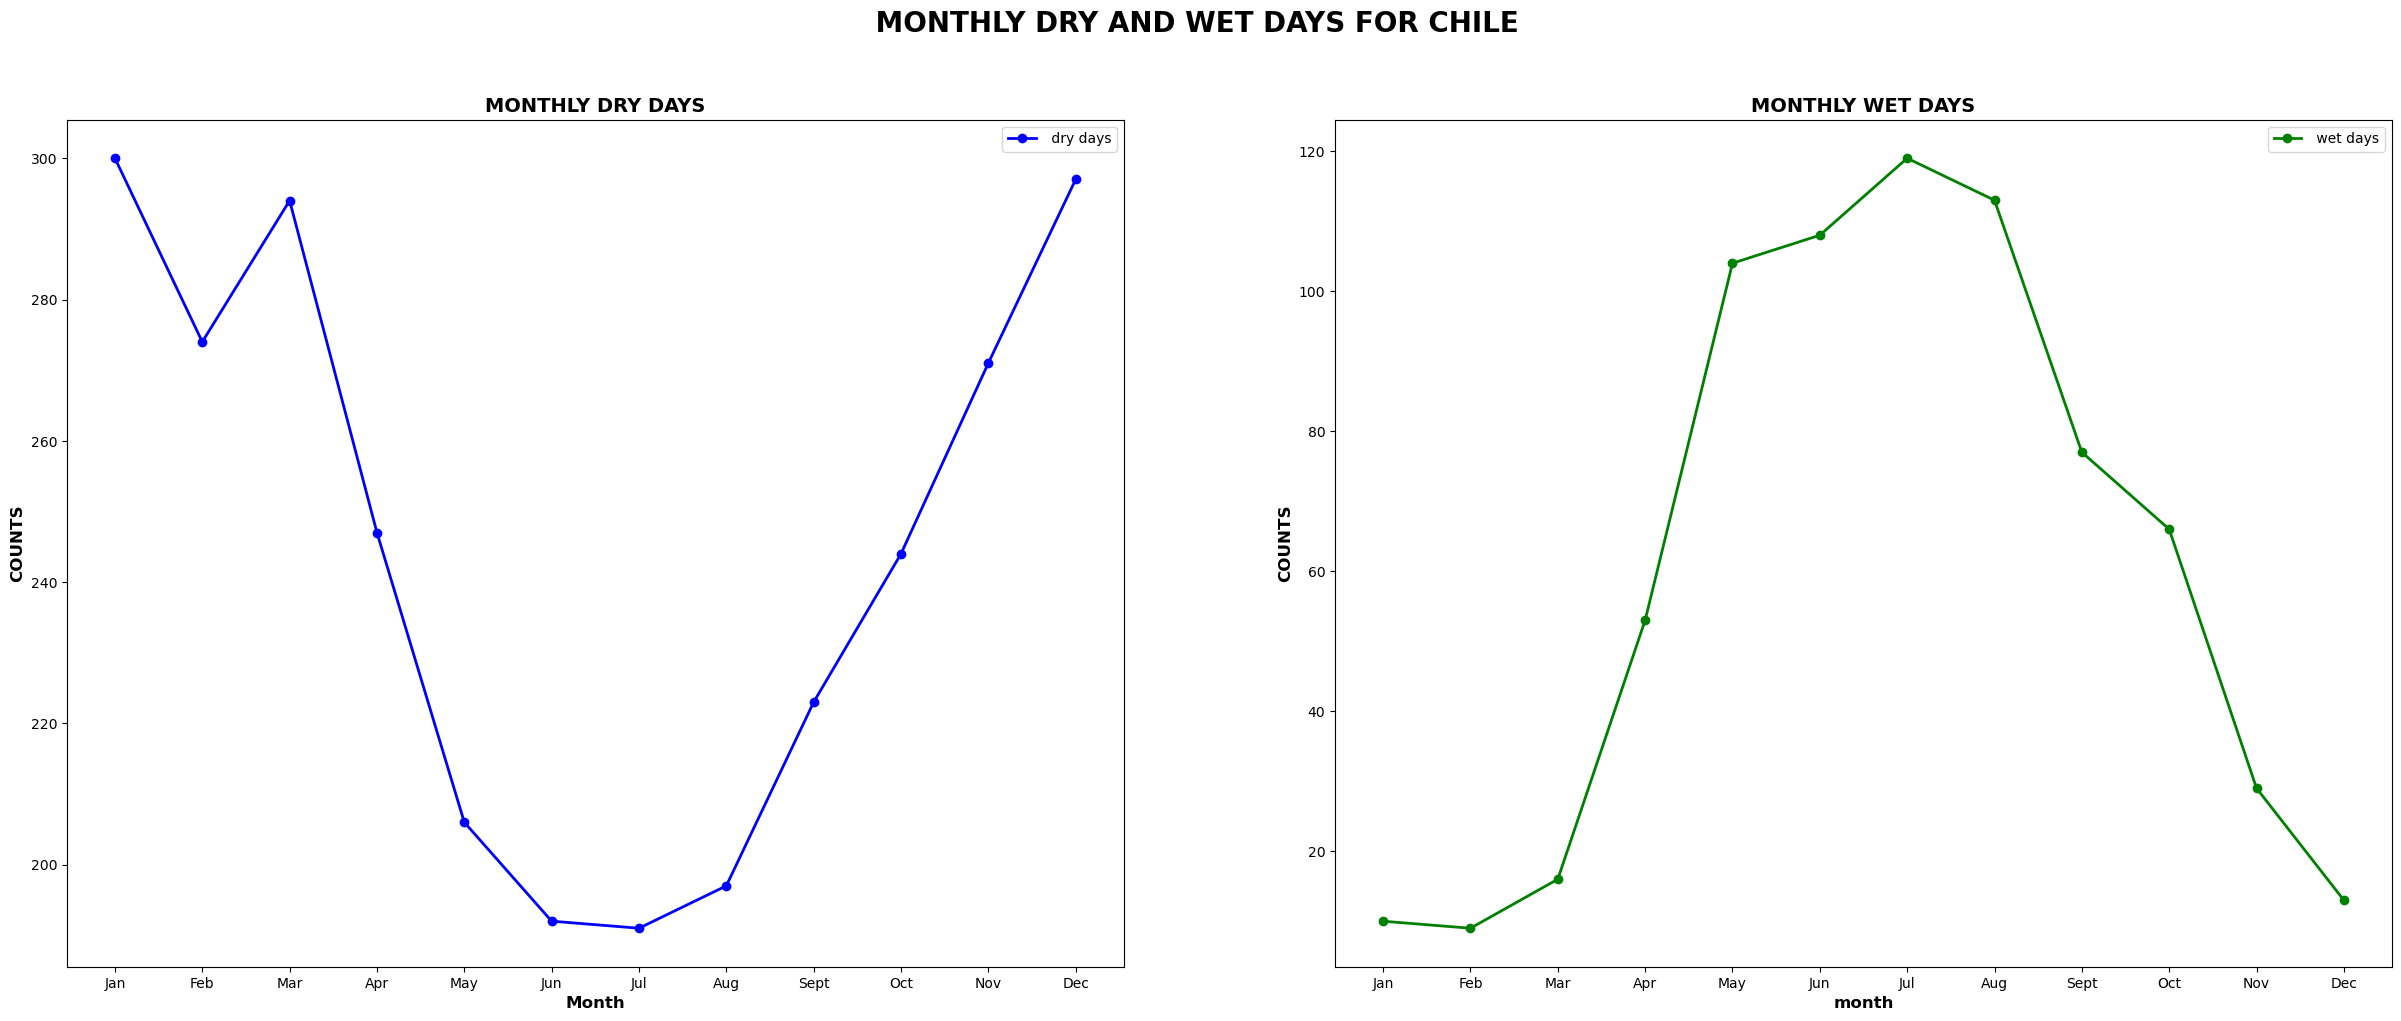

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 11))
ax = ax.flatten()

ax[0].plot(month,monthly_dry_days, label=' dry days', color='blue', marker='o', linewidth=2)
ax[0].set_xlabel('Month', fontsize=12,fontweight='bold')
ax[0].set_ylabel('COUNTS', fontsize=12, fontweight='bold')
ax[0].legend()
ax[0].set_title('MONTHLY DRY DAYS', fontsize=14, fontweight='bold')

ax[1].plot(month, monthly_wet_days, label=' wet days', color='green', marker='o', linewidth=2)
ax[1].set_xlabel('month', fontsize=12, fontweight='bold')
ax[1].set_ylabel('COUNTS', fontsize=12,fontweight='bold')
ax[1].legend()
ax[1].set_title('MONTHLY WET DAYS', fontsize=14, fontweight='bold')


fig.suptitle(' MONTHLY DRY AND WET DAYS FOR CHILE', fontweight='bold', fontsize=20)
fig.savefig('monthly-dry- and- wet- days', bbox_inches='tight', dpi=500)

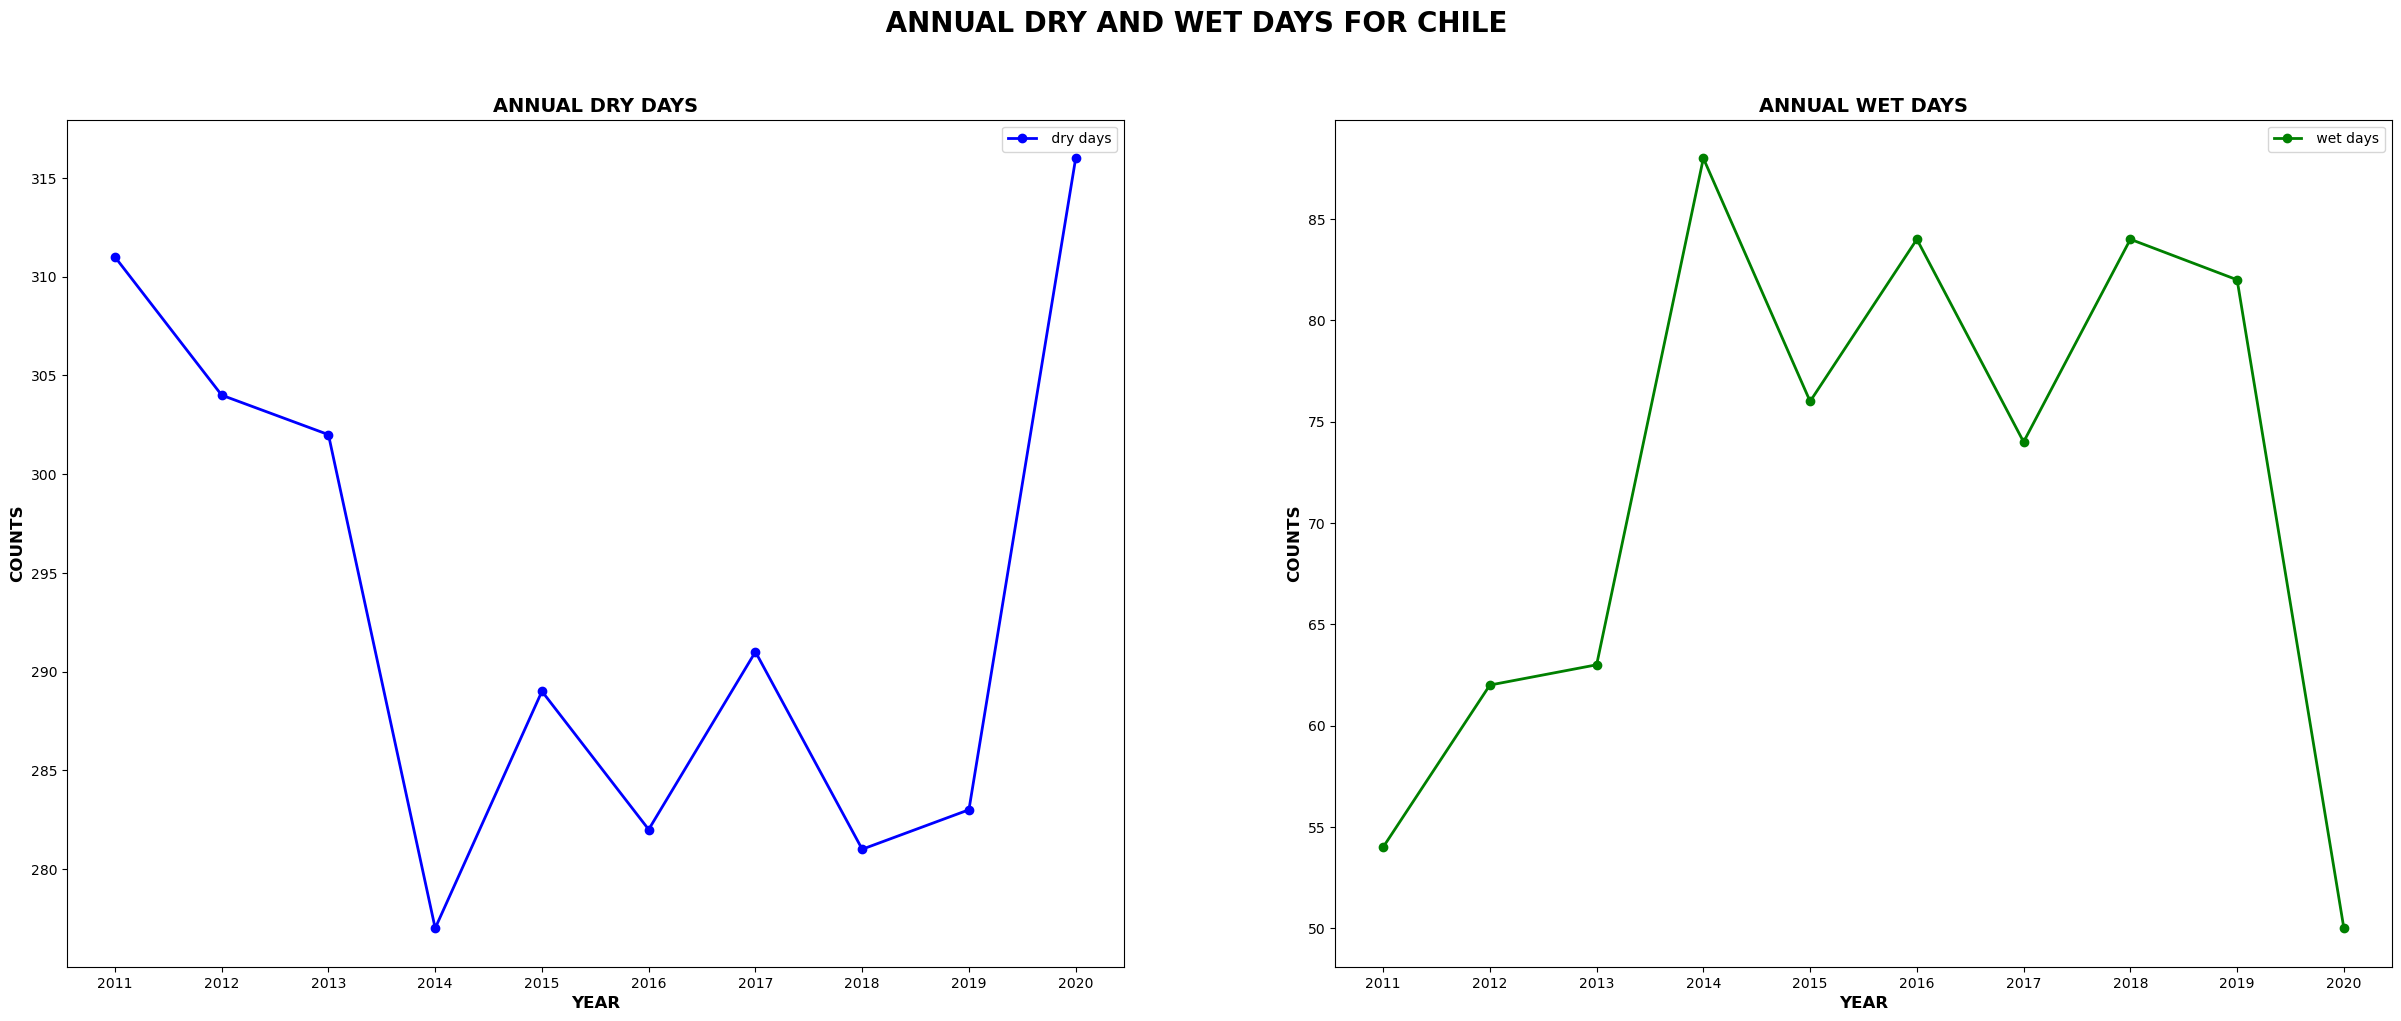

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 11))
ax = ax.flatten()

ax[0].plot(year,annual_dry_days, label=' dry days', color='blue', marker='o', linewidth=2)
ax[0].set_xlabel('YEAR', fontsize=12,fontweight='bold')
ax[0].set_ylabel('COUNTS', fontsize=12, fontweight='bold')
ax[0].legend()
ax[0].set_title('ANNUAL DRY DAYS', fontsize=14, fontweight='bold')

ax[1].plot(year,annual_wet_days, label=' wet days', color='green', marker='o', linewidth=2)
ax[1].set_xlabel('YEAR', fontsize=12, fontweight='bold')
ax[1].set_ylabel('COUNTS', fontsize=12,fontweight='bold')
ax[1].legend()
ax[1].set_title('ANNUAL WET DAYS', fontsize=14, fontweight='bold')


fig.suptitle(' ANNUAL DRY AND WET DAYS FOR CHILE', fontweight='bold', fontsize=20)
fig.savefig('annual-dry- and- wet- days', bbox_inches='tight', dpi=500)

# FOR SPATIAL PLOT

In [40]:
wet_days_ts = CHILE_RR.where(CHILE_RR >= 1)
dry_days_ts = CHILE_RR.where(CHILE_RR < 1)
monthly_dry_days_ts = dry_days_ts.groupby('datetime.month').count('datetime')
monthly_wet_days_ts = wet_days_ts.groupby('datetime.month').count('datetime')
annual_dry_days_ts  = dry_days_ts.groupby('datetime.year').count('datetime')
annual_wet_days_ts  = wet_days_ts.groupby('datetime.year').count('datetime')

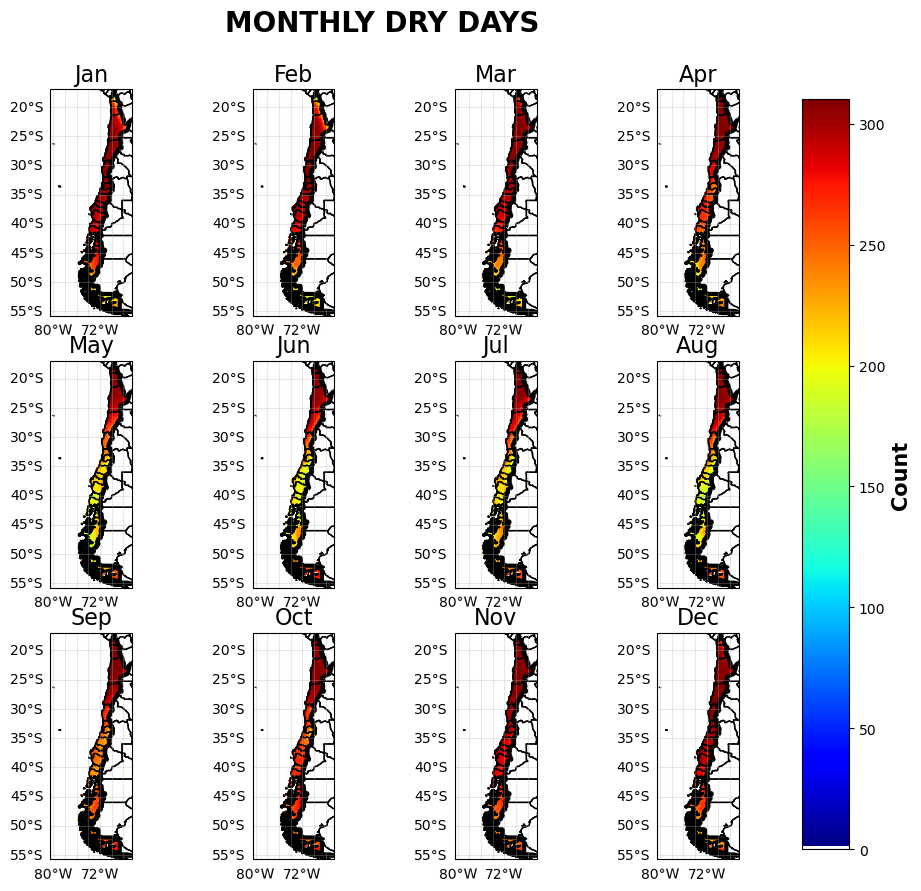

In [41]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(3, 4, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(month_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(monthly_dry_days_ts['lon'],monthly_dry_days_ts['lat'],monthly_dry_days_ts[i], cmap=new_cmap)
    ax[i].set_title(month_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('MONTHLY DRY DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('monthly-dry-conts.png', bbox_inches='tight', dpi=500)


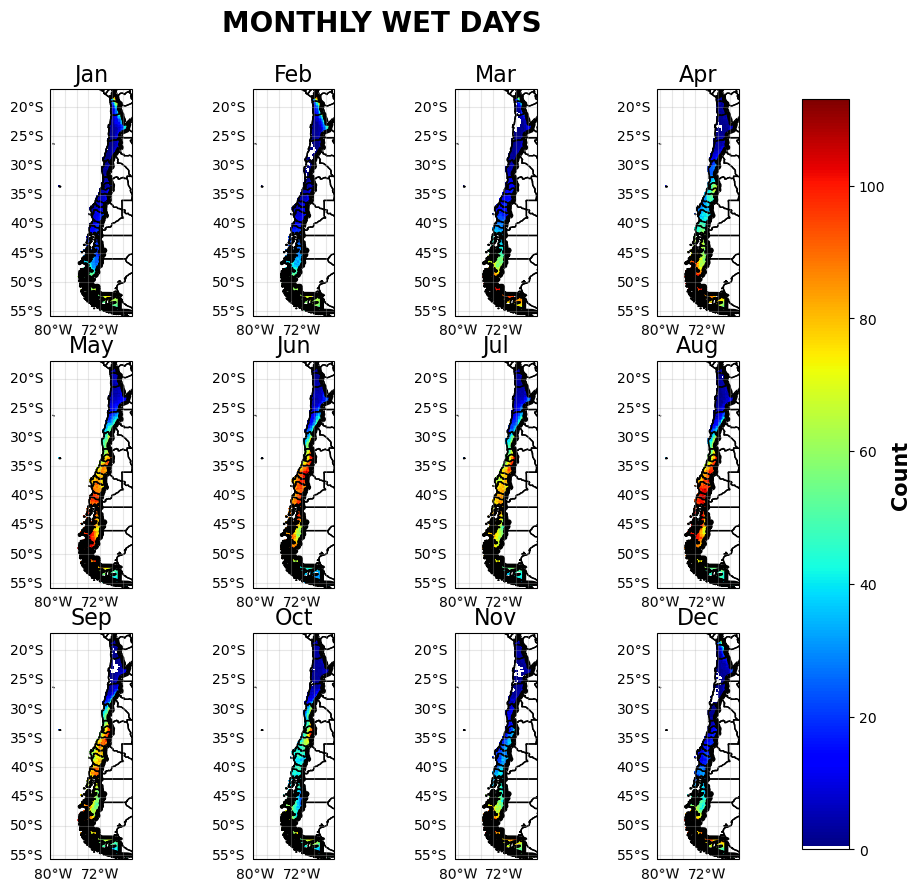

In [42]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(3, 4, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(month_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(monthly_wet_days_ts['lon'],monthly_wet_days_ts['lat'],monthly_wet_days_ts[i], cmap=new_cmap)
    ax[i].set_title(month_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('MONTHLY WET DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('monthly-wet-conts.png', bbox_inches='tight', dpi=500)


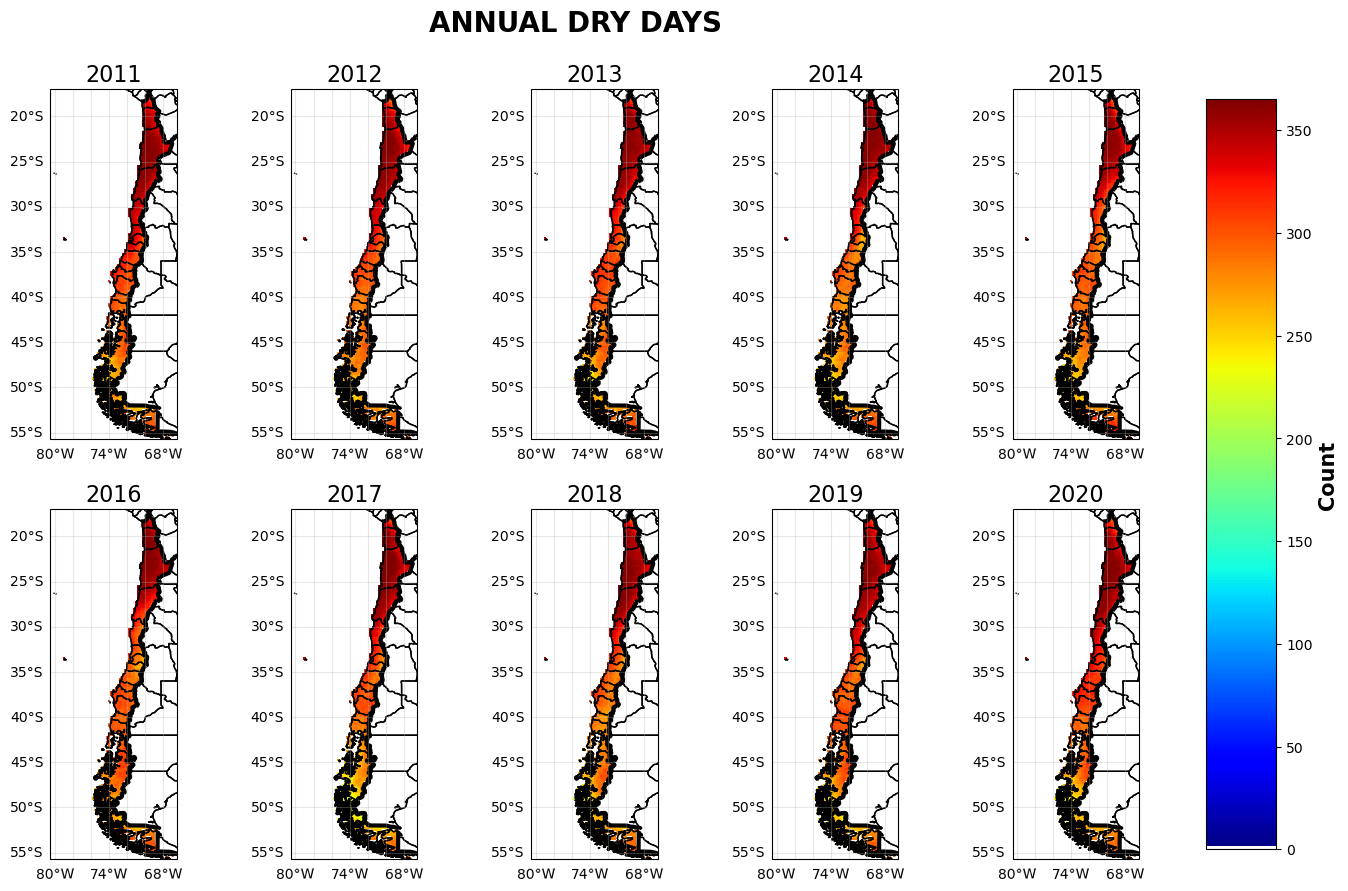

In [43]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(year_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(annual_dry_days_ts['lon'],annual_dry_days_ts['lat'],annual_dry_days_ts[i], cmap=new_cmap)
    ax[i].set_title(year_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('ANNUAL DRY DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('annual-dry-conts.png', bbox_inches='tight', dpi=500)


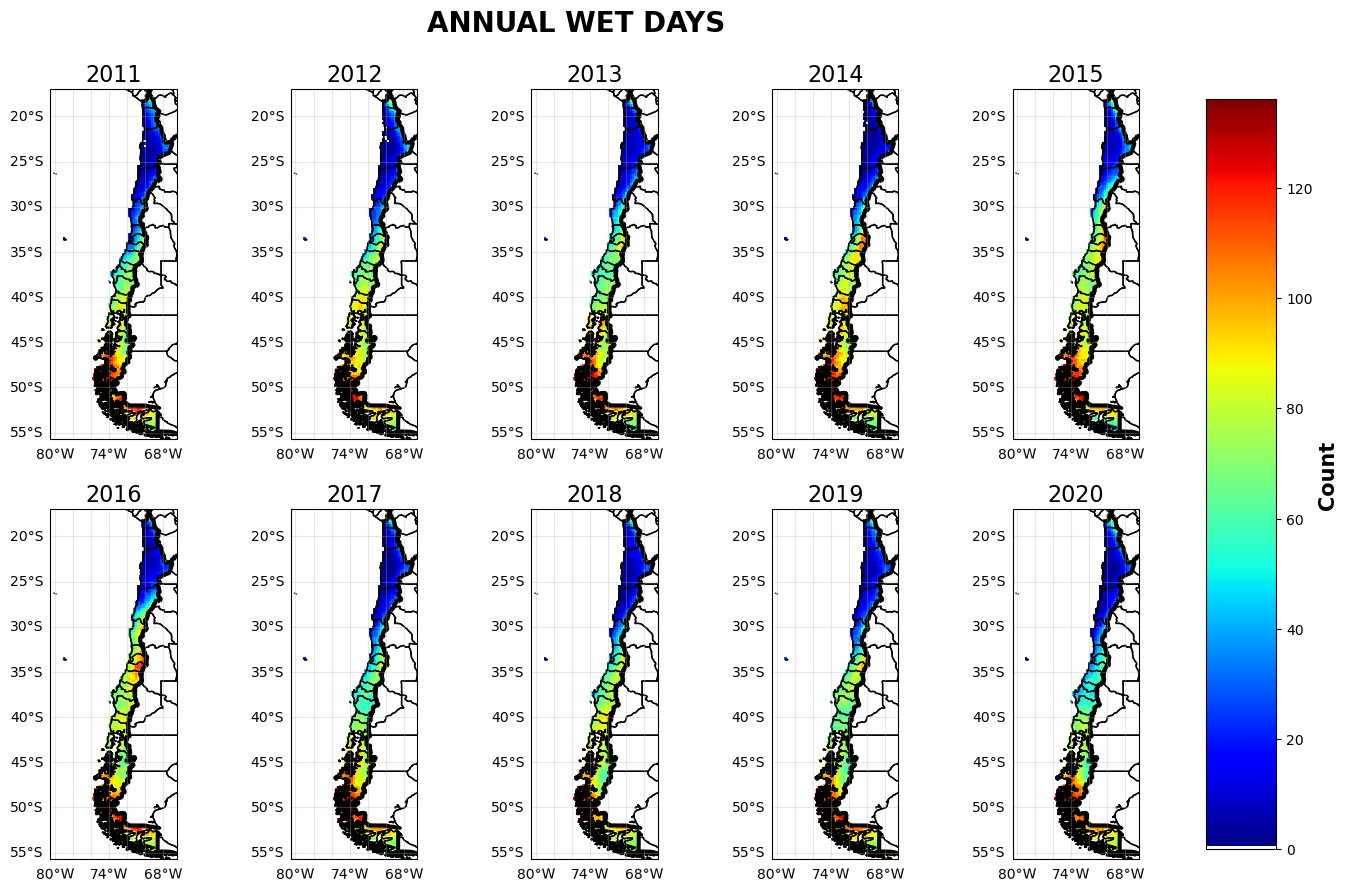

In [44]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(year_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(annual_wet_days_ts['lon'],annual_wet_days_ts['lat'],annual_wet_days_ts[i], cmap=new_cmap)
    ax[i].set_title(year_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('ANNUAL WET DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('annual-wet-conts.png', bbox_inches='tight', dpi=500)


# Performing similar analysis as Item 3, but for extreme rainfall indices (RR>10mm and R> 20mm)

# TIME SERIES FOR EXTREME RAINFALL INDICES

In [45]:
extreme_10mm_days = CHILE_rr.where(CHILE_rr > 10)
extreme_20mm_days = CHILE_rr.where(CHILE_rr > 20)

In [46]:
monthly_extreme_10mm= extreme_10mm_days.groupby('datetime.month').count('datetime')
monthly_extreme_20mm= extreme_20mm_days.groupby('datetime.month').count('datetime')
yearly_extreme_10mm= extreme_10mm_days.groupby('datetime.year').count('datetime')
yearly_extreme_20mm= extreme_20mm_days.groupby('datetime.year').count('datetime')

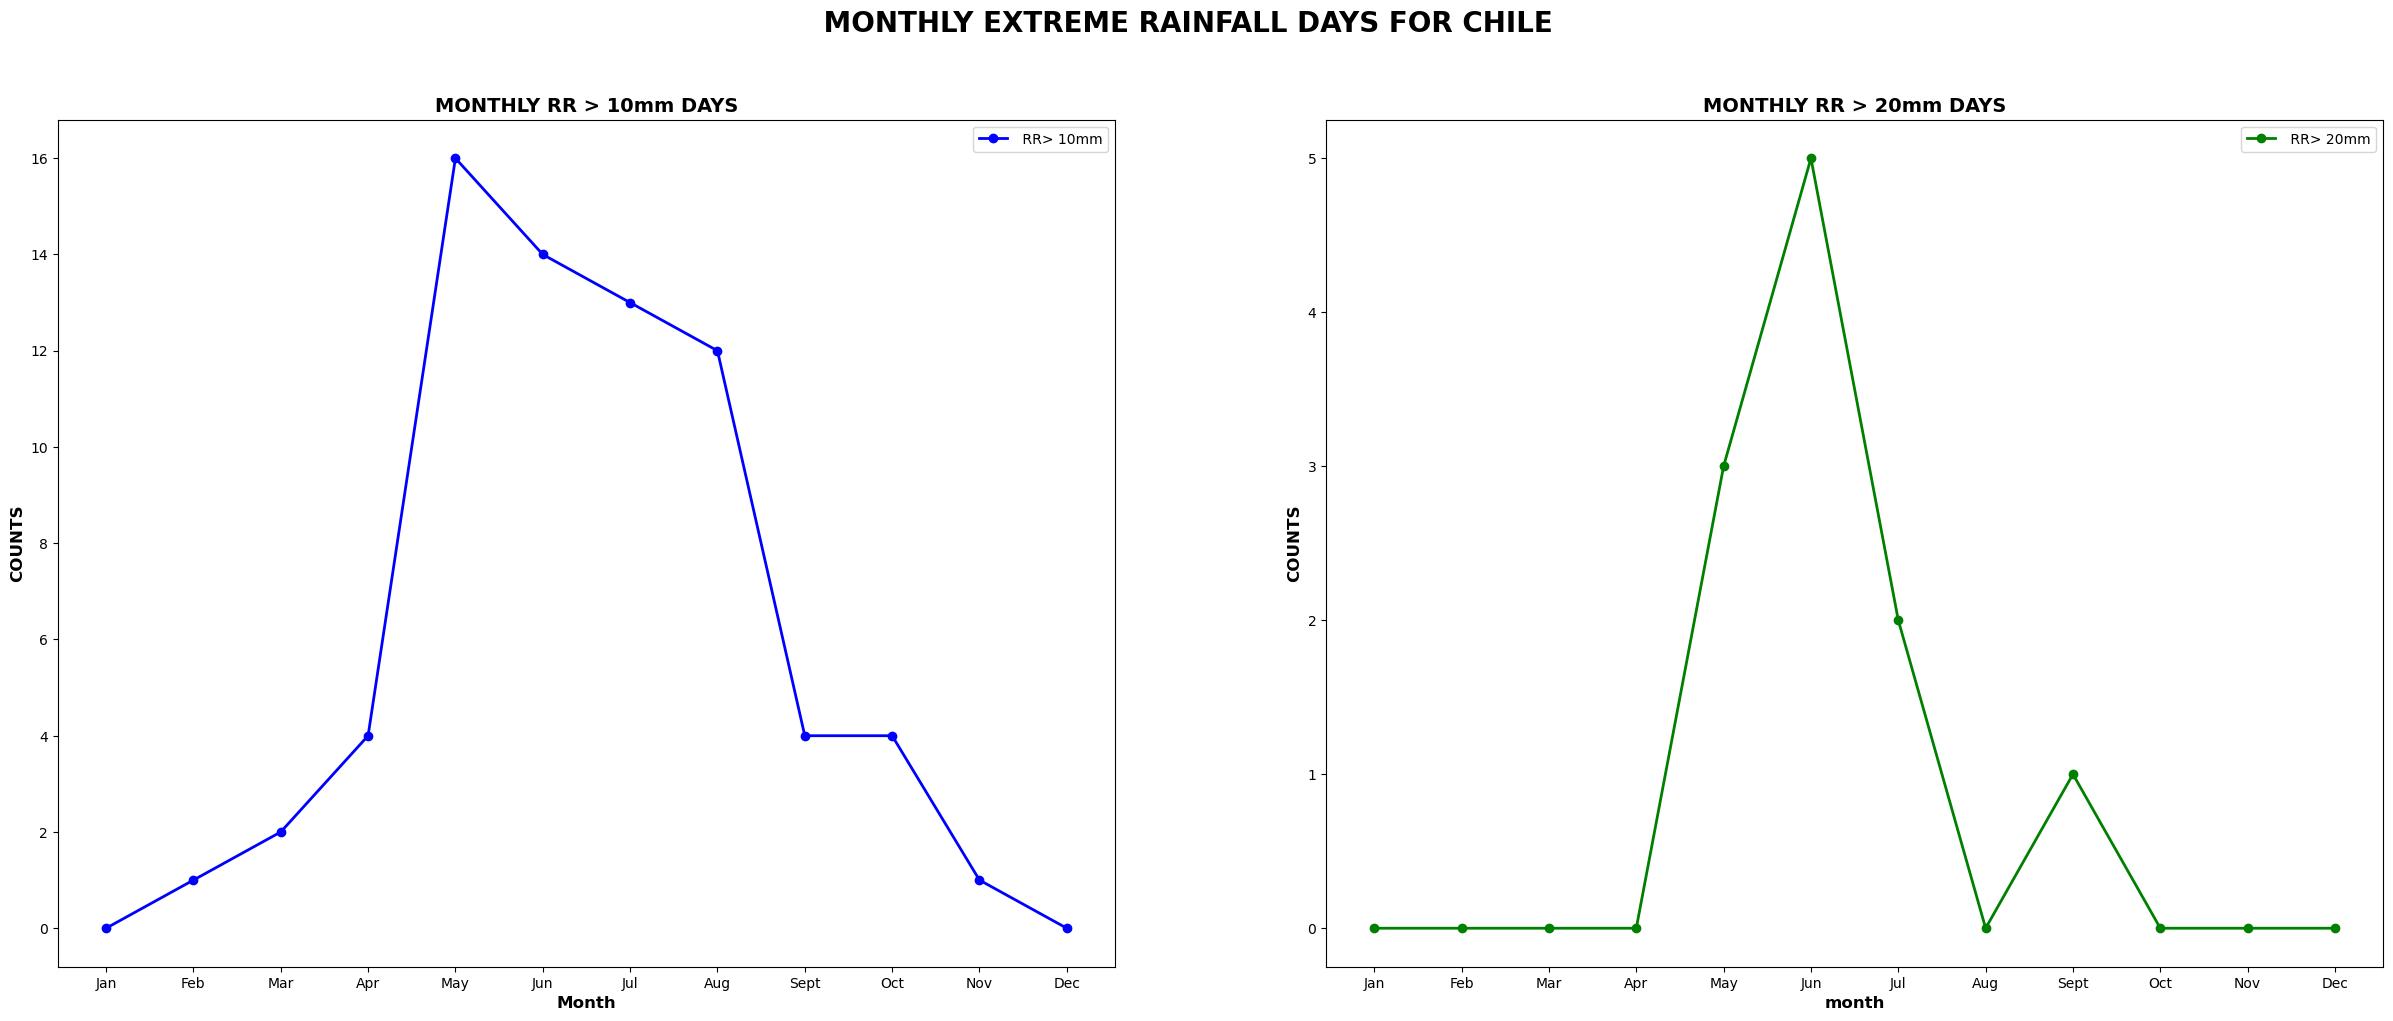

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 11))
ax = ax.flatten()

ax[0].plot(month,monthly_extreme_10mm, label=' RR> 10mm', color='blue', marker='o', linewidth=2)
ax[0].set_xlabel('Month', fontsize=12,fontweight='bold')
ax[0].set_ylabel('COUNTS', fontsize=12, fontweight='bold')
ax[0].legend()
ax[0].set_title('MONTHLY RR > 10mm DAYS', fontsize=14, fontweight='bold')

ax[1].plot(month, monthly_extreme_20mm, label=' RR> 20mm', color='green', marker='o', linewidth=2)
ax[1].set_xlabel('month', fontsize=12, fontweight='bold')
ax[1].set_ylabel('COUNTS', fontsize=12,fontweight='bold')
ax[1].legend()
ax[1].set_title('MONTHLY RR > 20mm DAYS', fontsize=14, fontweight='bold')


fig.suptitle(' MONTHLY EXTREME RAINFALL DAYS FOR CHILE', fontweight='bold', fontsize=20)
fig.savefig('monthly-extreme- days', bbox_inches='tight', dpi=500)

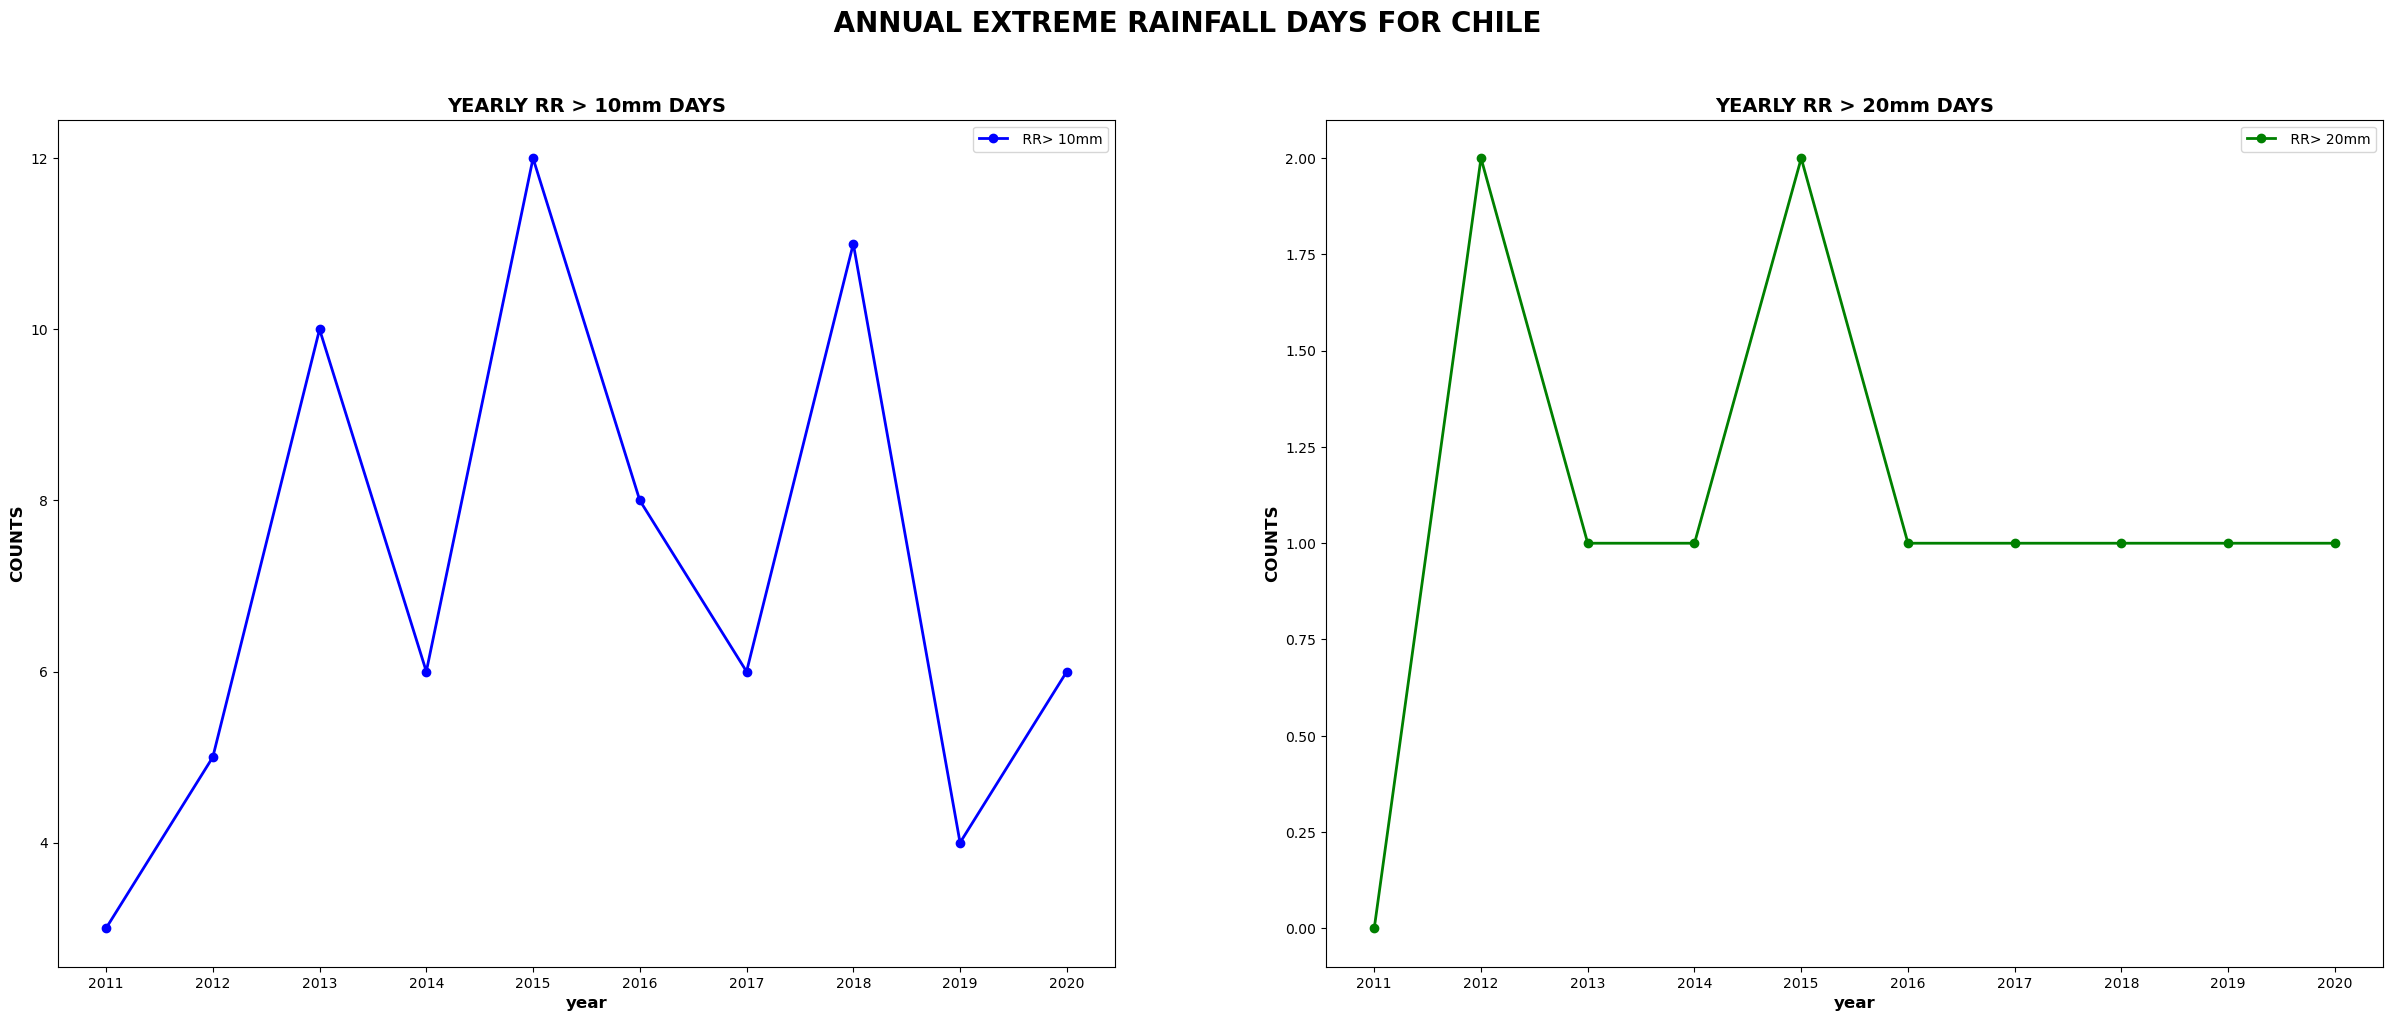

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 11))
ax = ax.flatten()

ax[0].plot(year,yearly_extreme_10mm, label=' RR> 10mm', color='blue', marker='o', linewidth=2)
ax[0].set_xlabel('year', fontsize=12,fontweight='bold')
ax[0].set_ylabel('COUNTS', fontsize=12, fontweight='bold')
ax[0].legend()
ax[0].set_title('YEARLY RR > 10mm DAYS', fontsize=14, fontweight='bold')

ax[1].plot(year, yearly_extreme_20mm, label=' RR> 20mm', color='green', marker='o', linewidth=2)
ax[1].set_xlabel('year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('COUNTS', fontsize=12,fontweight='bold')
ax[1].legend()
ax[1].set_title('YEARLY RR > 20mm DAYS', fontsize=14, fontweight='bold')


fig.suptitle(' ANNUAL EXTREME RAINFALL DAYS FOR CHILE', fontweight='bold', fontsize=20)
fig.savefig('annual-extreme- days', bbox_inches='tight', dpi=500)

# FOR SPATIAL PLOTS

In [49]:
extreme_10mm_days_sp = CHILE_RR.where(CHILE_RR > 10)
extreme_20mm_days_sp = CHILE_RR.where(CHILE_RR > 20)

#computations
monthly_extreme_10mm_sp = extreme_10mm_days_sp.groupby('datetime.month').count('datetime')
monthly_extreme_20mm_sp = extreme_20mm_days_sp.groupby('datetime.month').count('datetime')
yearly_extreme_10mm_sp = extreme_10mm_days_sp.groupby('datetime.year').count('datetime')
yearly_extreme_20mm_sp = extreme_20mm_days_sp.groupby('datetime.year').count('datetime')

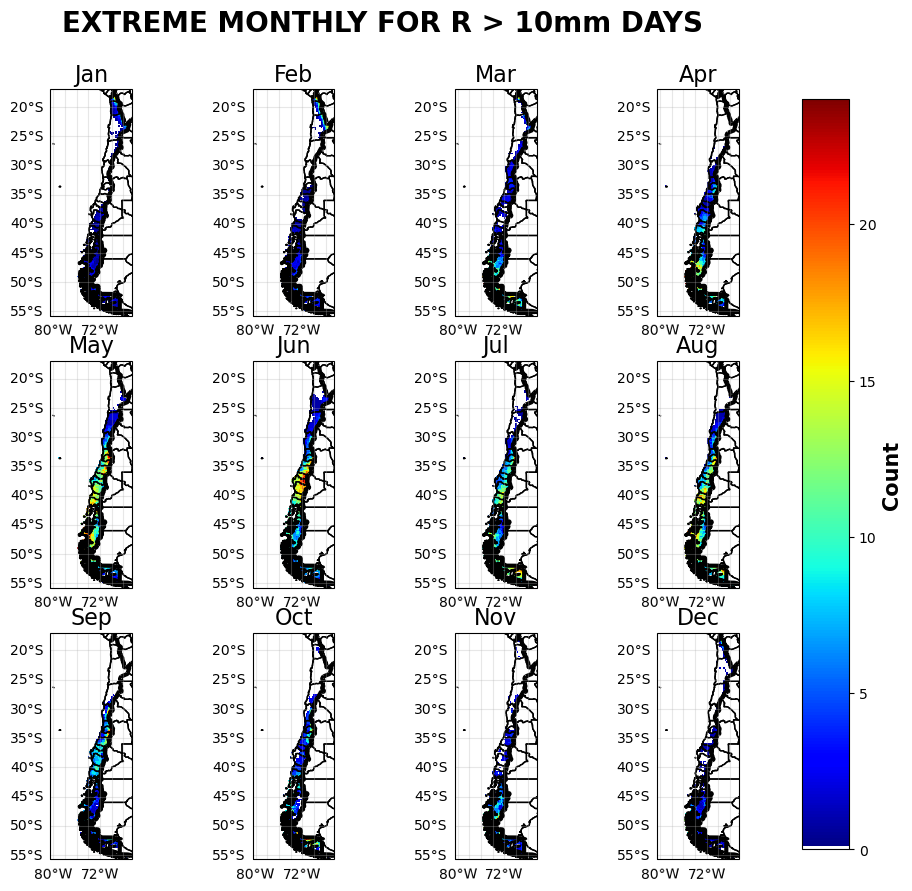

In [50]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(3, 4, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(month_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(monthly_extreme_10mm_sp['lon'],monthly_extreme_10mm_sp['lat'],monthly_extreme_10mm_sp[i], cmap=new_cmap)
    ax[i].set_title(month_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('EXTREME MONTHLY FOR R > 10mm DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('monthly-extreme- 10conts.png', bbox_inches='tight', dpi=500)


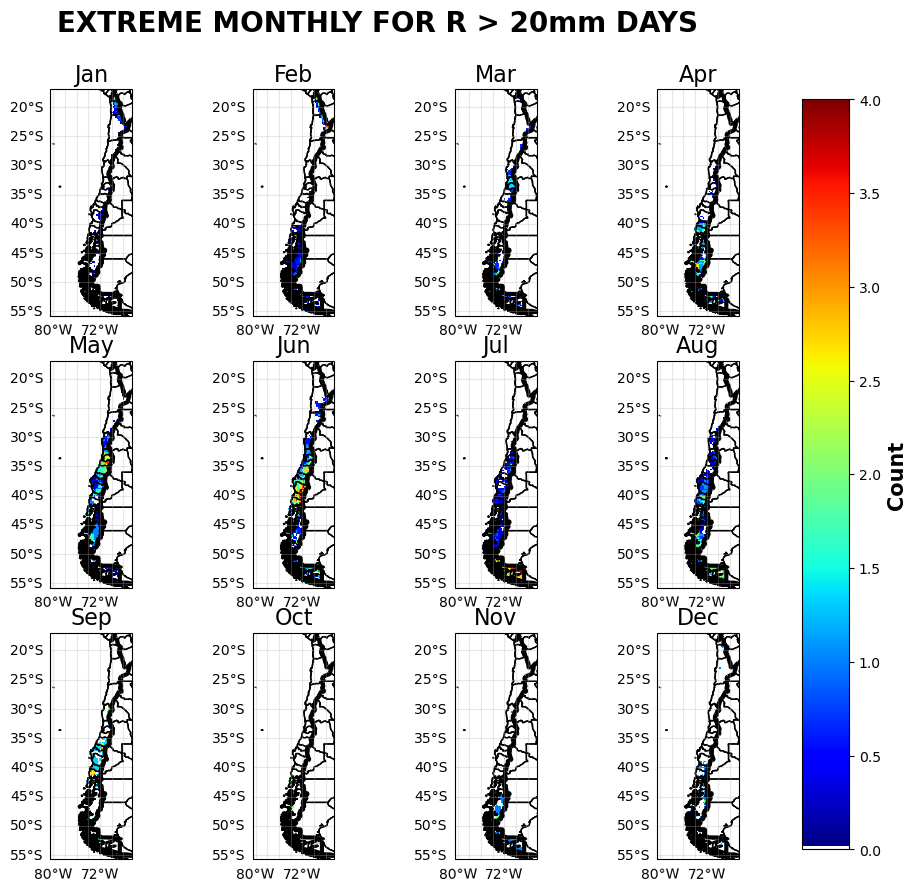

In [51]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(3, 4, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(month_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(monthly_extreme_20mm_sp['lon'],monthly_extreme_20mm_sp['lat'],monthly_extreme_20mm_sp[i], cmap=new_cmap)
    ax[i].set_title(month_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('EXTREME MONTHLY FOR R > 20mm DAYS ', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('monthly-extreme- 20conts.png', bbox_inches='tight', dpi=500)


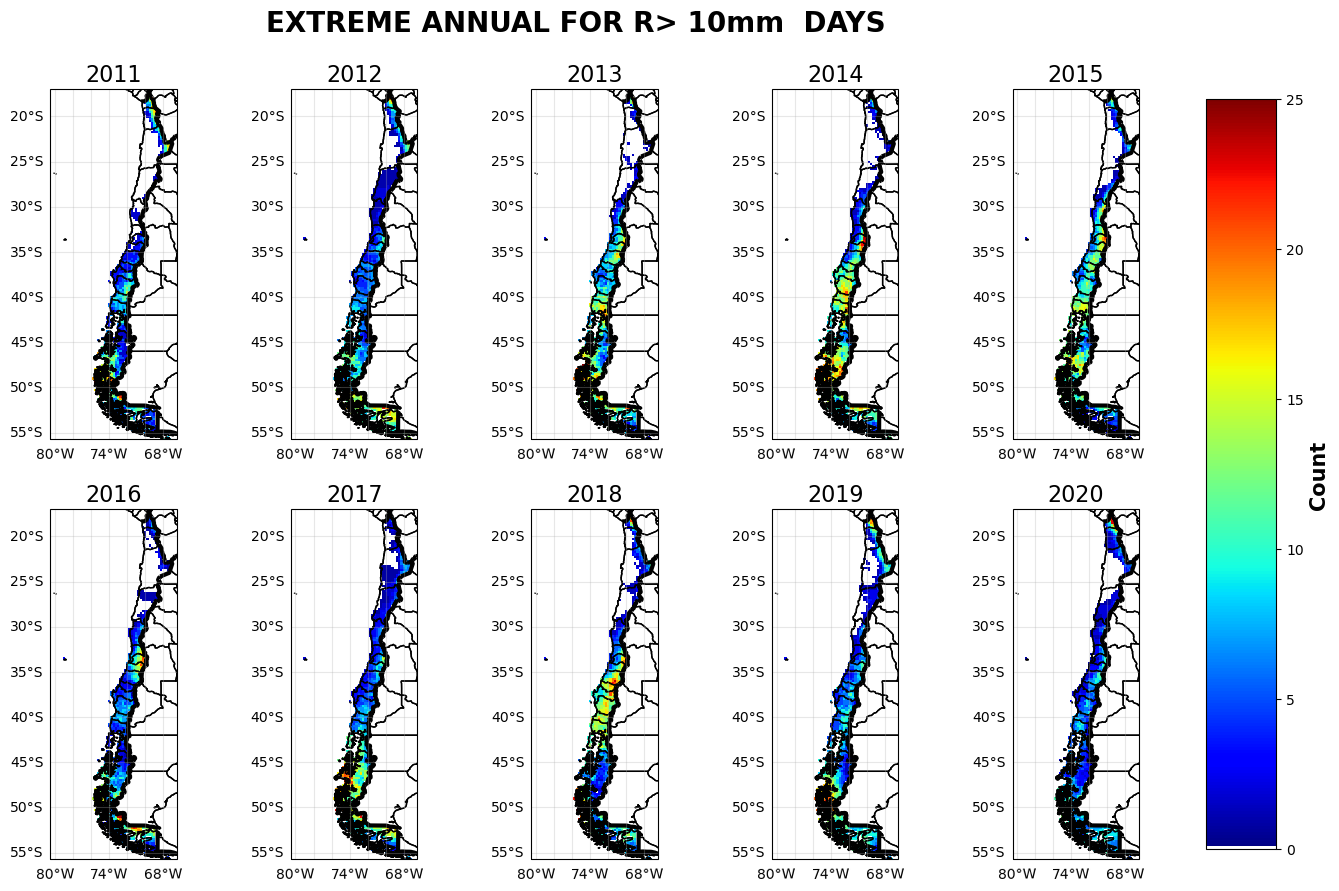

In [52]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(year_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(yearly_extreme_10mm_sp['lon'],yearly_extreme_10mm_sp['lat'],yearly_extreme_10mm_sp[i], cmap=new_cmap)
    ax[i].set_title(year_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('EXTREME ANNUAL FOR R> 10mm  DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('annual-extreme10mm.png', bbox_inches='tight', dpi=500)


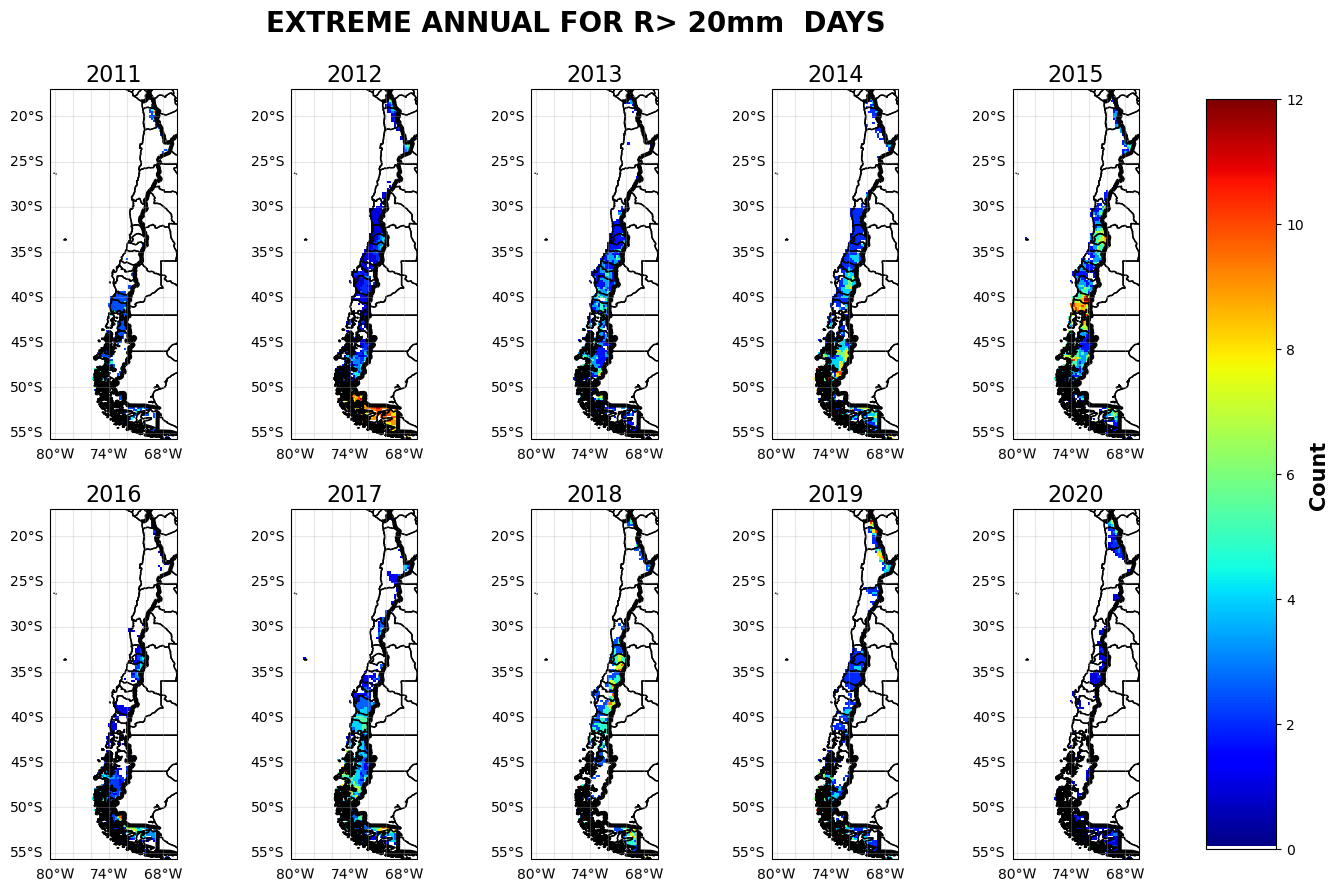

In [53]:
cmap = plt.get_cmap('jet')

# Modify the colormap
colors = cmap(np.arange(cmap.N))
colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # change the first color to white
new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

year_names = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
for i, axes in enumerate(ax):
    ax[i].add_feature(cfeature.LAND)
    ax[i].add_feature(cfeature.BORDERS, linewidth=3)
    ax[i].add_feature(cfeature.STATES)
    ax[i].coastlines(resolution='10m')
    ax[i].set_title(year_names[i], fontsize=16)

    # set extent
    lonW, lonE, latS, latN = -80.5, -66.5, -17.0, -55.75
    extent = (lonW, lonE, latS, latN)
    ax[i].set_extent(extent, crs=ccrs.PlateCarree())

    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 1}
    gl.ylabel_style = {'color': 'black'}
    
#     cs = monthly_dry_days_ts.plot(ax=ax[i])
    cs= ax[i].pcolormesh(yearly_extreme_20mm_sp['lon'],yearly_extreme_20mm_sp['lat'],yearly_extreme_20mm_sp[i], cmap=new_cmap)
    ax[i].set_title(year_names[i], fontsize=16)

# Create a color bar
cbar_ax = fig.add_axes([0.92, 0.12, 0.047, 0.75])  # lbwh
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Count", fontsize=15, fontweight='bold')

fig.suptitle('EXTREME ANNUAL FOR R> 20mm  DAYS', fontweight='bold', fontsize=20, y=0.96)
fig.savefig('annual-extreme-20mm.png', bbox_inches='tight', dpi=500)


# THE END